## Amy Hatman
## 11.2 Exercise: Building a CNN Image Classifier
## May 26, 2024

In [1]:
## importing needed packages
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models, Input
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

### 1. Load the MNIST data set.

In [2]:
# loading the data set and setting train and test set
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

### 2. Display the first five images in the training data set (see section 8.1 in the Machine Learning with Python Cookbook). Compare these to the first five training labels.

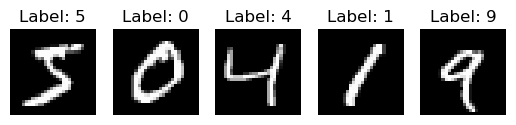

In [3]:
# for loop to show the first 5 images
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(f'Label: {y_train[i]}')
    plt.axis('off')

# displaying images
plt.show()

### 3. Build and train a Keras CNN classifier on the MNIST training set.

In [4]:
# Reshaping the data to include channel dimension
x_train = x_train.reshape((x_train.shape[0], 28, 28, 1))
x_test = x_test.reshape((x_test.shape[0], 28, 28, 1))

# Convert labels to categorical
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

# Building the CNN model (this step was confusing!!)
model = models.Sequential()
model.add(Input(shape=(28, 28, 1)))
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

# Compiling the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Training/Fitting the model
history = model.fit(x_train, y_train, epochs=5, batch_size=64, validation_split=0.1)

Epoch 1/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 25s 25ms/step - accuracy: 0.8551 - loss: 0.8461 - val_accuracy: 0.9767 - val_loss: 0.0829
Epoch 2/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 21s 24ms/step - accuracy: 0.9796 - loss: 0.0673 - val_accuracy: 0.9787 - val_loss: 0.0771
Epoch 3/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 21s 24ms/step - accuracy: 0.9851 - loss: 0.0471 - val_accuracy: 0.9885 - val_loss: 0.0431
Epoch 4/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 21s 24ms/step - accuracy: 0.9864 - loss: 0.0386 - val_accuracy: 0.9875 - val_loss: 0.0524
Epoch 5/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 21s 24ms/step - accuracy: 0.9895 - loss: 0.0337 - val_accuracy: 0.9842 - val_loss: 0.0581


### 4. Report the test accuracy of your model.

In [5]:
# Evaluate the model for accuracy
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"This model is", test_acc * 100, "% accurate")

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9787 - loss: 0.0681
This model is 98.25000166893005 % accurate


### 5. Display a confusion matrix on the test set classifications.

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step


<Figure size 1000x800 with 0 Axes>

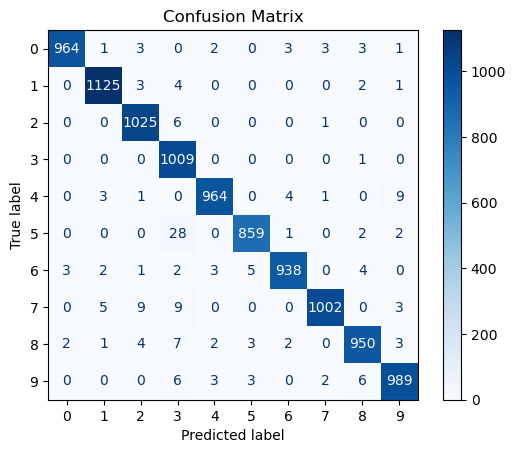

In [6]:
# Calculate predictions on the test set
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# Generate the confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=range(10))

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

### 6. Summarize your results.

From the confusion matrix as we see that the model performs very well. The diagonal line down the middle are correct predictions with  the other numbers the incorrect predictions. As is obvious, the vast majority were predicted correctly. This indicates, along with the accuracy score, that our model is a good fit for predicting the data set we are working with. 